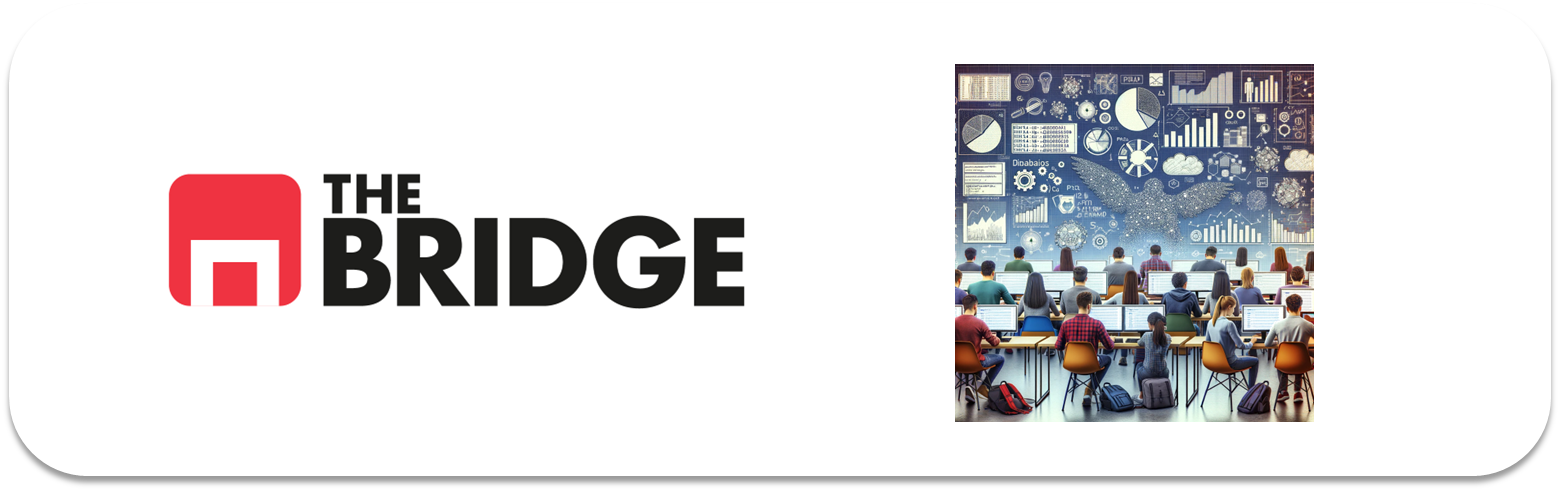

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [30]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv('data/hard_to_find/obligatoria_hard.csv', sep='|')

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [44]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

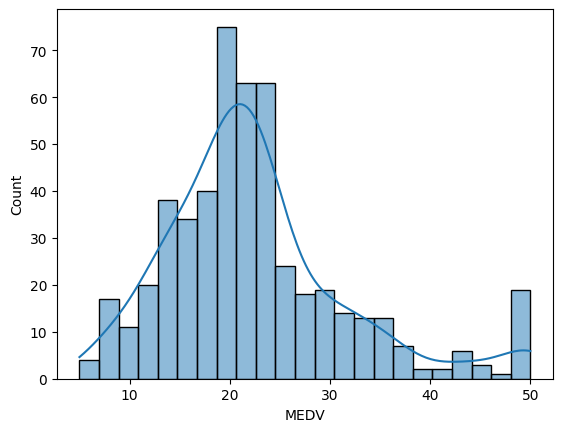

In [48]:
sns.histplot(df['MEDV'], kde=True)
plt.show()

In [41]:
df.corr(numeric_only = True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


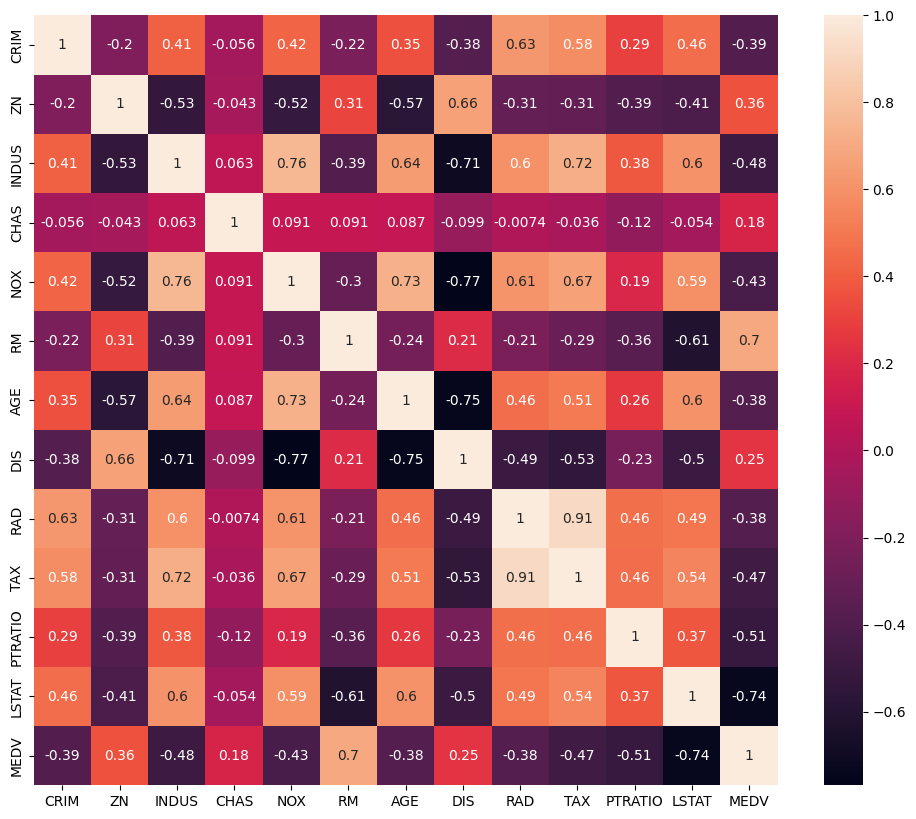

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only = True), annot=True);
plt.show();

In [51]:
# Features
X = df[[ 'NOX', 'TAX', 'LSTAT', 'PTRATIO', 'RM', 'INDUS']]

# Target
y = df['MEDV']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [53]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 6)
(404, 6)
(102, 6)
(404,)
(102,)


In [54]:
# Creamos un objeto
model = LinearRegression()

In [55]:
# entrenamos los datos de train
model.fit(X_train, y_train)

LinearRegression()

In [56]:
#parámetro w0 ó intercept
model.intercept_

21.854303898779136

In [57]:
model.coef_

array([-5.09123742e+00, -2.22616087e-03, -5.70624892e-01, -9.39110986e-01,
        4.41014925e+00,  1.02363646e-01])

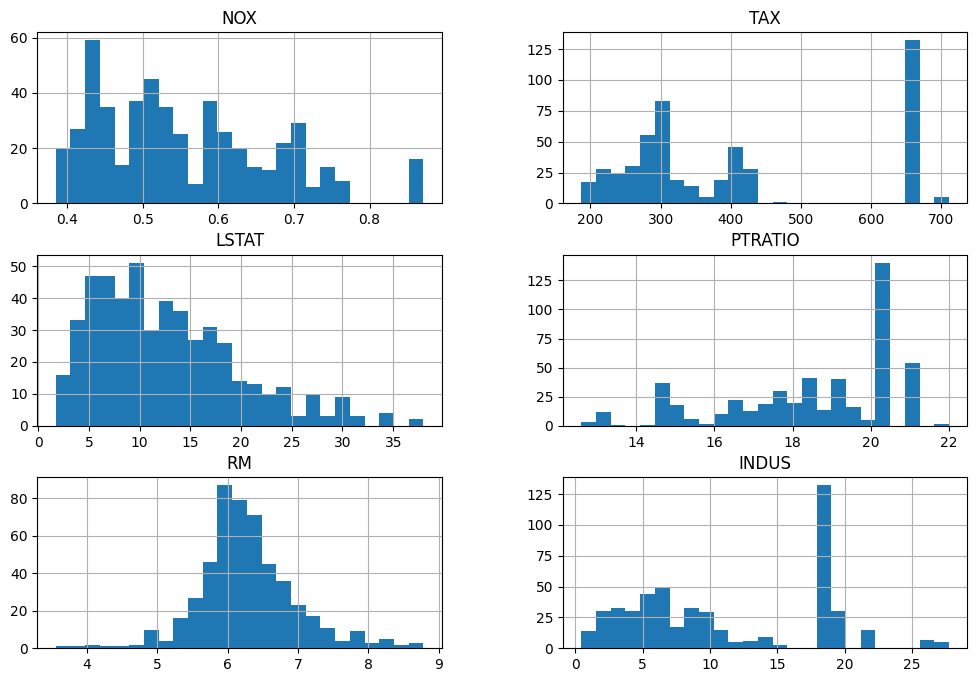

In [61]:
X.hist(bins=25, figsize=(12, 8))
plt.show()

In [65]:
var = np.array([[1, 420, 15, 16, 7, 10]])
model.predict(var)

C:\Users\JAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.13761097])

In [66]:
prediccion = model.predict(X_test)
prediccion

array([31.18448724, 19.96488016, 18.20341407, 27.61086125, 32.18973771,
       19.36938873, 18.05430023, 31.73714752, 25.57200077,  2.53546332,
       25.34087549, 17.16672065, 21.75172966, 25.74596965, 23.76240009,
       29.10045191,  4.06929702, 37.15619546, 21.74612481, 24.52631976,
       25.56013407, 16.1046722 , 27.62466799, 26.7851303 , 31.6675743 ,
       19.52827975,  1.64903898, 27.8088495 , 31.99135085, 39.86232628,
       15.03169562, 20.52068569, 21.63798992, 29.85795219, 27.68586589,
       16.72893909, 21.31354747, 25.98240987, 32.40426858, 21.8812647 ,
       14.45684906, 26.68367679, 28.24951755, 22.7993896 , 25.66923228,
       32.43952398, 30.38266231, 30.05034832, 28.30519982, 30.85973706,
       21.11458317, 12.67416815, 23.28249428, 31.8987075 , 21.15056668,
       21.81817583, 20.39570109, 16.59767293,  3.7395488 , 24.37557442,
       18.29662409, 24.25775658, 23.07497958, 16.13662884, 26.09796799,
       19.83516367, 38.88263589, 19.34622608, 27.38644661, 32.32

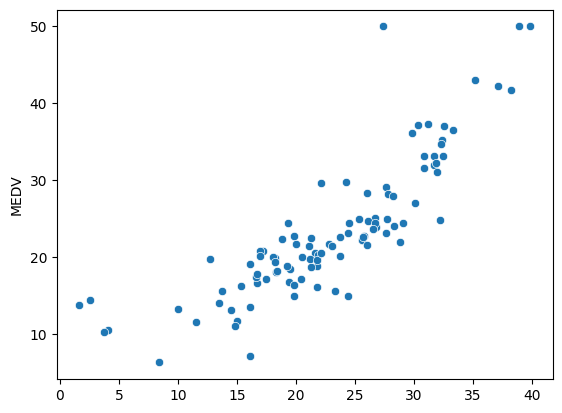

In [71]:
sns.scatterplot(x=prediccion, y= y_test);
plt.plot()
plt.show()

In [67]:
train = model.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, train))
print('MSE train', metrics.mean_squared_error(y_train, train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, train)))
print('R2 train', model.score(X_train, y_train))

MAE train 3.6660086772411833
MSE train 28.05641427317232
RMSE train 5.296830587546888
R2 train 0.6723683351767714


In [72]:
print('MAE test', metrics.mean_absolute_error(y_test, prediccion))
print('MSE test', metrics.mean_squared_error(y_test, prediccion))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))
print('R2 test', model.score(X_test, y_test))

MAE test 3.4113625012683104
MSE test 22.71934461550669
RMSE test 4.766481366323243
R2 test 0.7114881173495871


In [73]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
df_coef

,Coefficient
NOX,-5.091237
TAX,-0.002226
LSTAT,-0.570625
PTRATIO,-0.939111
RM,4.410149
INDUS,0.102364


In [74]:
from sklearn.preprocessing import StandardScaler

escalado = StandardScaler()
escalado.fit(X_train)

X_train_escalado = escalado.transform(X_train)

In [75]:
X_train_escalado

array([[ 1.15964408,  1.51216046,  3.38058506,  0.81269145, -2.46823886,
         0.98064497],
       [-0.55748764, -0.74336019, -0.92488108,  0.5369406 ,  0.20524476,
        -0.57655895],
       [ 1.56317004,  1.51216046,  0.85115858,  0.81269145,  0.30394933,
         0.98064497],
       ...,
       [ 1.21974369,  1.51216046,  0.6084006 ,  0.81269145, -0.78462101,
         0.98064497],
       [-1.03055743, -0.64218908, -0.04453464, -0.70393823, -0.79449147,
        -0.76830421],
       [-1.08979848, -0.48745679, -1.27785676,  0.30714823,  0.23767626,
        -0.79735652]])

In [76]:
model_escalado = LinearRegression()
model_escalado.fit(X_train_escalado, y_train)

LinearRegression()

In [77]:
coeficiente = pd.DataFrame(model_escalado.coef_,
                           X_train.columns,
                           columns=['Importancia_estandar']).sort_values('Importancia_estandar',
                                                                         ascending=False)
coeficiente

,Importancia_estandar
RM,3.127621
INDUS,0.704685
TAX,-0.374067
NOX,-0.592993
PTRATIO,-2.043390
LSTAT,-4.090030


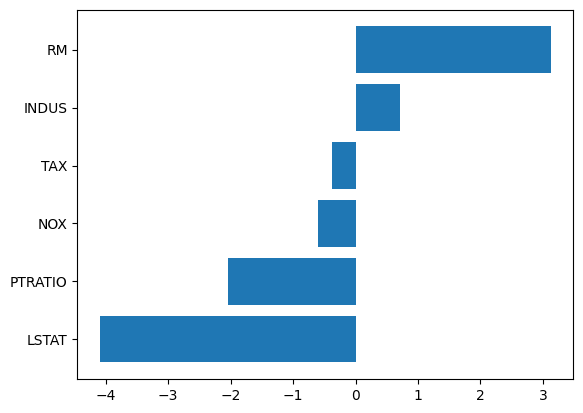

In [78]:
features = coeficiente.sort_values('Importancia_estandar')
plt.barh(features.index, features.Importancia_estandar)
plt.show()